### Customer Churn prediction - Datahack

A Bank wants to take care of customer retention for their product; savings accounts. The bank wants you to identify customers likely to churn balances below the minimum balance. You have the customers information such as age, gender, demographics along with their transactions with the bank. Your task as a data scientist would be to predict the propensity to churn for each customer.


## Data Dictionary

There are multiple variables in the dataset which can be cleanly divided in 3 categories:

### Demographic information about customers

<b>customer_id</b> - Customer id

<b>vintage</b> - Vintage of the customer with the bank in number of days

<b>age</b> - Age of customer

<b>gender</b> - Gender of customer

<b>dependents</b> - Number of dependents

<b>occupation</b> - Occupation of the customer 

<b>city</b> - City of customer (anonymised)


### Bank Related Information for customers


<b>customer_nw_category</b> - Net worth of customer (3:Low 2:Medium 1:High)

<b>branch_code</b> - Branch Code for customer account

<b>days_since_last_transaction</b> - No of Days Since Last Credit in Last 1 year


### Transactional Information

<b>current_balance</b> - Balance as of today

<b>previous_month_end_balance</b> - End of Month Balance of previous month


<b>average_monthly_balance_prevQ</b> - Average monthly balances (AMB) in Previous Quarter

<b>average_monthly_balance_prevQ2</b> - Average monthly balances (AMB) in previous to previous quarter

<b>percent_change_credits</b> - Percent Change in Credits between last 2 quarters

<b>current_month_credit</b> - Total Credit Amount current month

<b>previous_month_credit</b> - Total Credit Amount previous month

<b>current_month_debit</b> - Total Debit Amount current month

<b>previous_month_debit</b> - Total Debit Amount previous month

<b>current_month_balance</b> - Average Balance of current month

<b>previous_month_balance</b> - Average Balance of previous month

<b>churn</b> - Average balance of customer falls below minimum balance in the next quarter (1/0)


### Loading the data
Loading the csv as a dataframe and checking structure of the dataset

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv("churn_prediction.csv")

In [4]:
df.shape , df.columns

((28382, 21),
 Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
        'city', 'customer_nw_category', 'branch_code',
        'days_since_last_transaction', 'current_balance',
        'previous_month_end_balance', 'average_monthly_balance_prevQ',
        'average_monthly_balance_prevQ2', 'current_month_credit',
        'previous_month_credit', 'current_month_debit', 'previous_month_debit',
        'current_month_balance', 'previous_month_balance', 'churn'],
       dtype='object'))

In [5]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

As shown dtypes function puts city and branch code features in the numerical category but that is not the intention

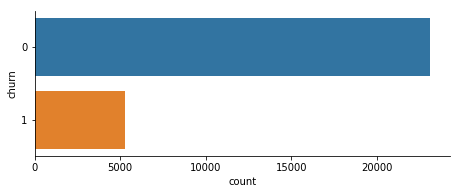

In [6]:
ax = sns.catplot(y="churn", kind="count", data=df, height=2.6, aspect=2.5, orient='h')

In [7]:
df.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


* not a lot of difference between mean and  median in vintage column: less outlierss
* The average no of days of engagement with the bank is quite high, which justifies lower churn in the above vizualization
* A general trend on variables which are related to balances have a wide range with huge outliers, it will key to observe these outliers
* Most of the customers lie in category 2 or 3 for net worth and have on an average done the last transaction 70 days ago. Now the high net worth customers (Category) must have high credit, debit and balance values. Let's verify this using data.

### Customer Net worth Category &  Balance Features


In [8]:
cols = ['current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
        'current_month_credit','previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance']
df.groupby(['customer_nw_category'])[cols].mean()

,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
customer_nw_category,,,,,,,,,,
1,12883.682913,13436.613544,13098.982716,11810.444511,7728.400137,9409.866028,7911.434080,8086.710342,12878.068674,13242.281037
2,7773.279345,7744.492544,7839.095235,7433.073141,3749.500743,2893.806560,3894.684063,3163.730233,7858.371677,7794.672359
3,4795.520175,4957.438675,4947.972060,4959.714499,1401.650598,1535.054349,1758.351527,1851.125018,4873.170891,4954.843500


So there is clear consistency here as mean values of balance features and the credit/debit features have higher values for net worth category 1 and lower value for net worth categories 2 & 3.


### Balance & Credit/Debit Features : going a step into detail


#### Average Monthly Balance Features

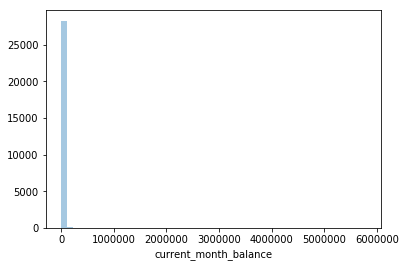

In [9]:
sns.distplot(df['current_month_balance'], kde = False)
plt.show()

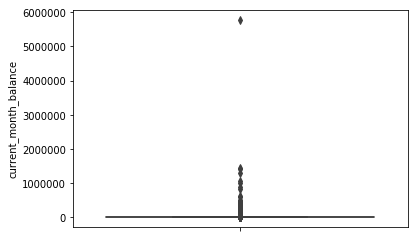

In [11]:
# What can be the problem?
sns.boxplot(df['current_month_balance'],orient='v')

* Clearly a lot of outliers : need to apply transformation:
1. attempt 1: Log transformation (adding a constant to avoid negative nos inside log)

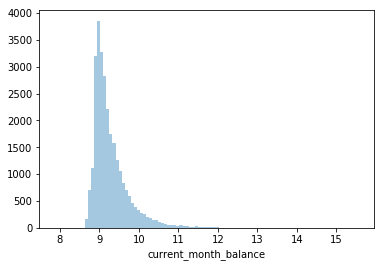

In [12]:
temp = np.log(df['current_month_balance'] + 6000) 

sns.distplot(temp, kde = False, bins = 100)
plt.show()

Now, we can see more clearly that this is a right skewed feature and we have much more clarity on its distribution. Let us use subplot to quickly look at more numerical features together and see trends.

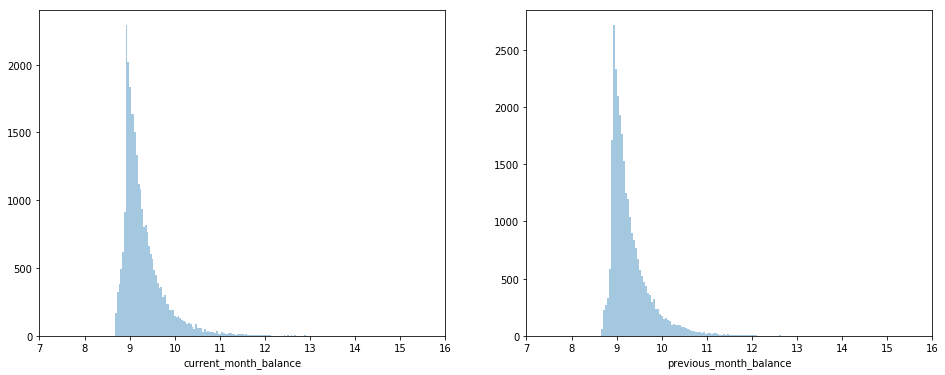

In [13]:
# Numerical Features
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))
xmin = 7
xmax = 16
# Current Month Average Balance
temp = np.log(df['current_month_balance'] + 6000) # To account for negative values we add a constant value within log
ax1.set_xlim([xmin,xmax])
ax1.set(xlabel='log of average balance of current month')
sns.distplot(temp, kde = False, bins = 200, ax = ax1)


# Previous month average balance
temp = np.log(df['previous_month_balance'] + 6000) # To account for negative values we add a constant value within log
ax2.set_xlim([xmin,xmax])
ax2.set(xlabel='log of average balance of previous month')
sns.distplot(temp, kde = False, bins = 200, ax = ax2)


plt.show()

As expected the average monthly balance for both months are quite similar and have right skewed histograms as shown. Now let us compare the current month average balance vs current balance as of today

#### Current Balance today vs Average Monthly Balance in current month

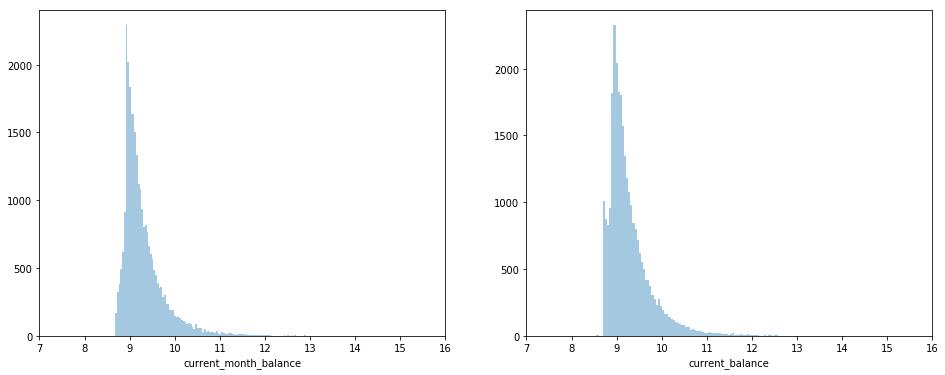

In [14]:
# Numerical Features
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))
xmin = 7
xmax = 16
# Current Month Average Balance
temp = np.log(df['current_month_balance'] + 6000) # To account for negative values we add a constant value within log
ax1.set_xlim([xmin,xmax])
sns.distplot(temp, kde = False, bins = 200, ax = ax1)


# Current End of month average balance
temp = np.log(df['current_balance'] + 6000) # To account for negative values we add a constant value within log
ax2.set_xlim([xmin,xmax])
sns.distplot(temp, kde = False, bins = 200, ax = ax2)


plt.show()

* Here, we can see that the distribution for both lie in almost the same interval, however, there are larger number of values for current balance just below 9 which might have been contributed by the churning customers. 

* It might be a good idea to create a feature which is the difference of these 2 variables during the model building process.


### Bivariate Analysis


#### Churn vs Current & Previous month balances

In [17]:
balance_cols = ['current_balance','previous_month_end_balance',
                'current_month_balance', 'previous_month_balance']
df1 = pd.DataFrame()

for i in balance_cols:
    df1[str('log_')+ i] = np.log(df[i] + 6000)

log_balance_cols = df1.columns
df1['churn'] = df['churn']

* Log of current balance & previous month end balance
* Log of average monthly balance of current and previous month
* Churn is represented by the color here 

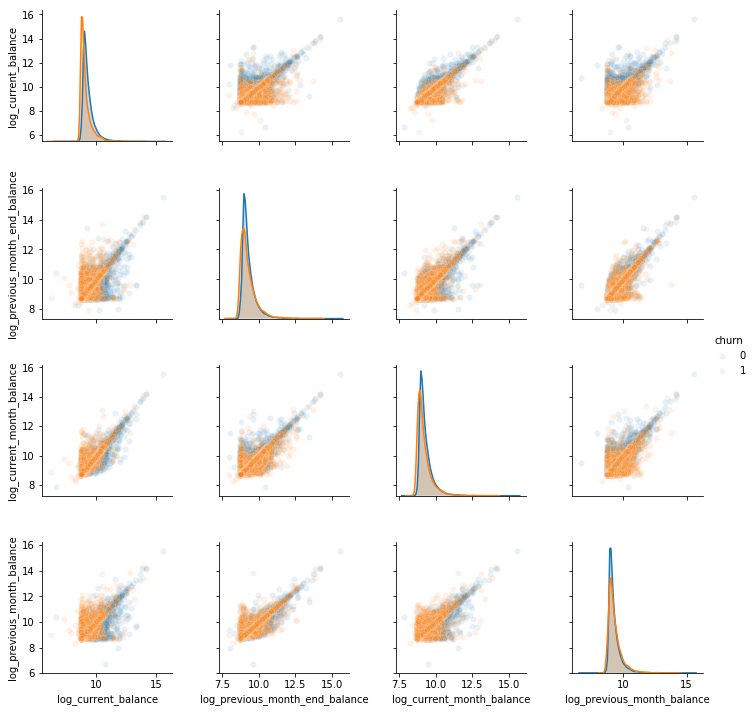

In [18]:
sns.pairplot(df1,vars=log_balance_cols,hue ='churn',plot_kws={'alpha':0.1})
plt.show()

* The lower balances tend to have higher number of churns which is clear from the scatter plots
* Distribution for the balances are all right skewed

### Credit and Debits for current and previous months


In [20]:
cr_dr_cols = ['current_month_credit','previous_month_credit', 
              'current_month_debit', 'previous_month_debit']
df2 = pd.DataFrame()

for i in cr_dr_cols:
    df2[str('log_')+ i] = np.log(df[i])

log_dr_cr_cols = df2.columns
df2['churn'] = df['churn']

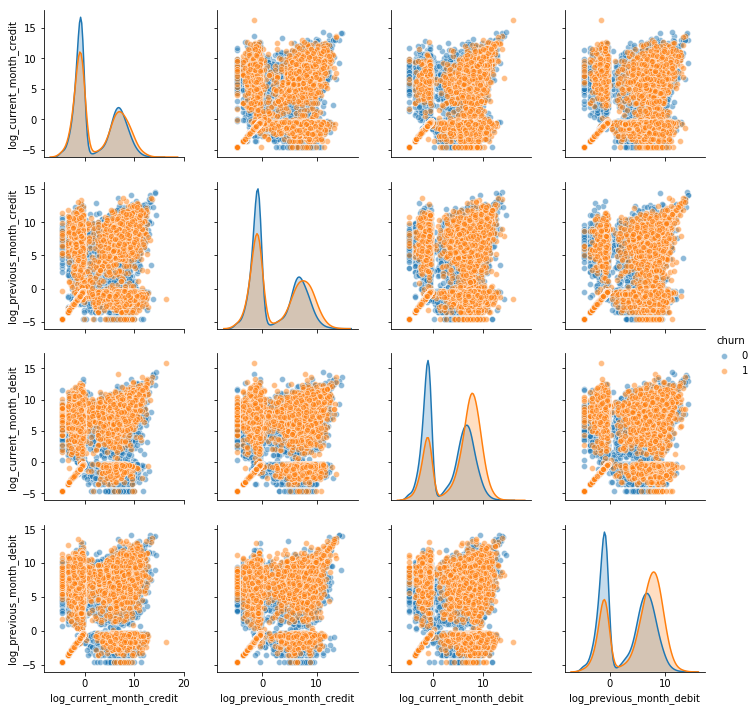

In [22]:
sns.pairplot(df2,vars=log_dr_cr_cols, hue = 'churn',plot_kws={'alpha':0.5})
plt.show()

Both credit and debit patterns show significant difference in distributions for churned and non churned customers.
* Bimodal distribution/Double Bell Curve shows that there are 2 different types of customers with 2 brackets of credit and debit. Now, during the modeling phase, these could be considered as a seperate set of customers
* For debit values, we see that there is a significant difference in the distribution for churn and non churn and it might be turn out to be an important feature

### Average monthly balance of previous and previous to previous quarters

Now, these 2 variables present deeper historical transactions and would help in understanding the trend during the last 2 quarters

In [43]:
q_cols = ['average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2']
df1 = pd.DataFrame()

for i in q_cols:
    df1[str('log_')+ i] = np.log(df[i] + 17000)

log_q_cols = df1.columns
df1['churn'] = df['churn']

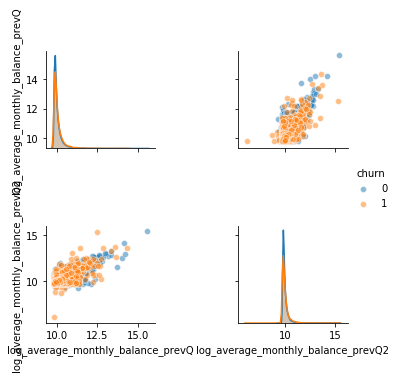

In [44]:
sns.pairplot(df1,vars=log_q_cols, hue = 'churn',plot_kws={'alpha':0.5})
plt.show()

The distributions do not have much difference when it comes to churn. 


However, there are some high negative values in the previous to previous quarters due to which there appears to be a lateral shift. However, if you look at the x-axis, it is still at the same scale for both features.

Removing the extreme outliers from the data using the 1 and 99th percentile would help us look at the correct distributions

In [45]:
# Remove 1st and 99th percentile and plot

df2 = df[['average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2']]

low = .01
high = .99
quant_df = df2.quantile([low, high])
print(quant_df)


      average_monthly_balance_prevQ  average_monthly_balance_prevQ2
0.01                      1449.0377                        121.6485
0.99                     60118.2288                      59357.8810


In [46]:
df3 = df2.apply(lambda x: x[(x>quant_df.loc[low,x.name]) & 
                                    (x < quant_df.loc[high,x.name])], axis=0)

In [47]:
q_cols = ['average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2']
df1 = pd.DataFrame()

for i in q_cols:
    df1[str('log_')+ i] = np.log(df3[i] + 17000)

log_q_cols = df1.columns
df1['churn'] = df['churn']


### Percent change in credits 

In [61]:
df['percent_change_credits'] = (df['current_month_debit'] - df['previous_month_credit'])/df['previous_month_credit']

In [62]:
change_cols = ['percent_change_credits']
df1 = pd.DataFrame()

for i in change_cols:
    df1[str('log_')+ i] = np.log(df[i] + 100)

log_change_cols = df1.columns
df1['churn'] = df['churn']


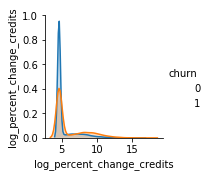

In [63]:
sns.pairplot(df1,vars=log_change_cols, hue = 'churn',plot_kws={'alpha':0.2})
plt.show()

In [73]:
# Remove 99th percentile and plot

df2 = df[['percent_change_credits']]

low=0.0
high = .80
quant_df = df2.quantile([low, high])
print(quant_df)

     percent_change_credits
0.0                -1.00000
0.8               385.69786


In [74]:
df3 = df2.apply(lambda x: x[(x>quant_df.loc[low,x.name]) & 
                                    (x < quant_df.loc[high,x.name])], axis=0)

In [79]:
change_cols = ['percent_change_credits']
df1 = pd.DataFrame()

for i in change_cols:
    df1[str('log_')+ i] = np.log(df3[i] + 100)

log_change_cols = df1.columns
df1['churn'] = df['churn']


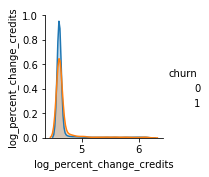

In [80]:
sns.pairplot(df1,vars=log_change_cols, hue = 'churn',plot_kws={'alpha':0.2})
plt.show()

## Demographics and Bank Related Information for customers

Revisiting the description for numerical demographic & Bank related customer variables we have:

#### Numerical:

<b>vintage</b> - Vintage of the customer with the bank in number of days

<b>age</b> - Age of customer

<b>days_since_last_transaction</b> - No of Days Since Last Credit in Last 1 year

#### Ordinal:

<b>dependents</b> - Number of dependents

<b>customer_nw_category</b> - Net worth of customer (3:Low 2:Medium 1:High)


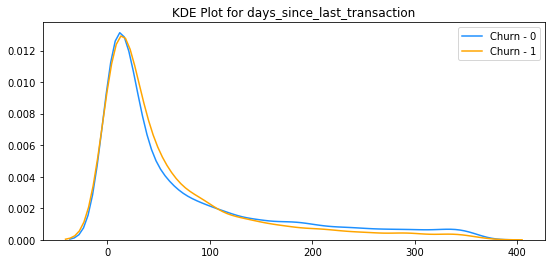

In [82]:
# KDE Plot Smoothens out even if there are no values for a value
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE Plot for {}".format(feature))
    ax0 = sns.kdeplot(df[df['churn'] == 0][feature].dropna(), color= 'dodgerblue', label= 'Churn - 0')
    ax1 = sns.kdeplot(df[df['churn'] == 1][feature].dropna(), color= 'orange', label= 'Churn - 1')

kdeplot('days_since_last_transaction')

There is no significant difference between the distributions for churning and non churning customers when it comes to days since last transaction.

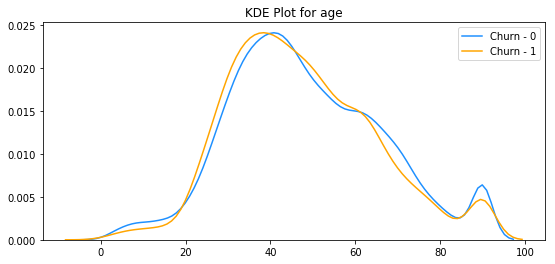

In [83]:
kdeplot('age')

Similarly, age also does not significantly affect the churning rate. However, customers above 80 years of age less likely to churn

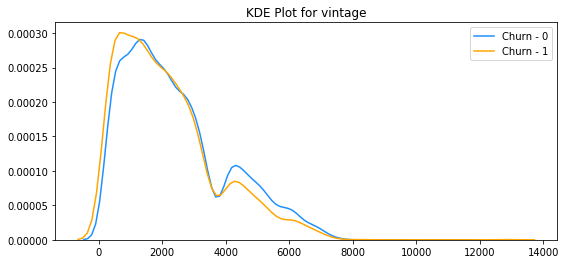

In [84]:
kdeplot('vintage')

For most frequent vintage values, the churning customers are slightly higher, while for higher values of vintage, we have mostly non churning customers which is in sync with the age variable 

This dataset has 4 categorical features (gender, occupation, city and branch code) as can be inferred from the data dictionary.

In [85]:
cat_cols = ['gender', 'occupation', 'city','branch_code']

for i in range(0,len(cat_cols)):
    print(str(cat_cols[i]) + " - Number of Unique Values: " + str(df[cat_cols[i]].nunique()))

gender - Number of Unique Values: 2
occupation - Number of Unique Values: 5
city - Number of Unique Values: 1604
branch_code - Number of Unique Values: 3185


### Univariate Analysis


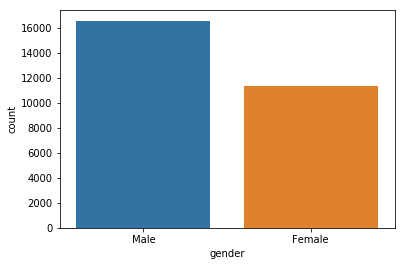

In [89]:
sns.countplot(x='gender',data=df)

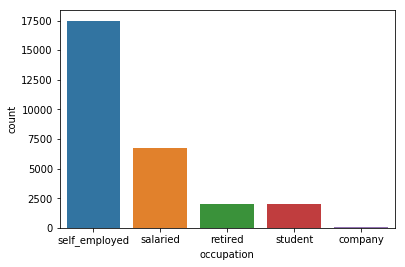

In [90]:
sns.countplot(x='occupation',data=df)

Now, branch code and city code have a lot of unique values and direct visualization will be difficult. Lets see how:

In [91]:
# Convert city variable wrt degree of number of customers
df['city_bin'] = df['city'].copy()
counts = df.city.value_counts()
df.city_bin[df['city'].isin(counts[counts > 900].index)] = 3
df.city_bin[df['city'].isin(counts[counts < 900].index) & df['city_bin'].isin(counts[counts >= 350].index)] = 2
df.city_bin[df['city'].isin(counts[counts < 350].index) & df['city_bin'].isin(counts[counts >= 100].index)] = 1
df.city_bin[df['city'].isin(counts[counts < 100].index)] = 0

df['city_bin'] = pd.to_numeric(df['city_bin'], errors='coerce')

/home/mitushi/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/mitushi/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/mitushi/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/mitushi/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCo

In [93]:
df.city.value_counts()

1020.0    3479
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
334.0      930
1232.0     840
623.0      778
15.0       669
575.0      631
1525.0     375
905.0      345
491.0      312
1111.0     312
1494.0     289
649.0      281
1589.0     251
318.0      245
1084.0     240
61.0       237
531.0      227
656.0      197
904.0      187
630.0      166
1181.0     150
1271.0     150
1076.0     133
745.0      130
996.0      119
621.0      114
          ... 
1179.0       1
1421.0       1
973.0        1
847.0        1
1001.0       1
1279.0       1
1137.0       1
1245.0       1
1594.0       1
948.0        1
1026.0       1
1166.0       1
1545.0       1
808.0        1
503.0        1
1300.0       1
1605.0       1
824.0        1
607.0        1
1011.0       1
728.0        1
1207.0       1
566.0        1
972.0        1
1448.0       1
629.0        1
527.0        1
1212.0       1
530.0        1
70.0         1
Name: city, Length: 1604, dtype: int64

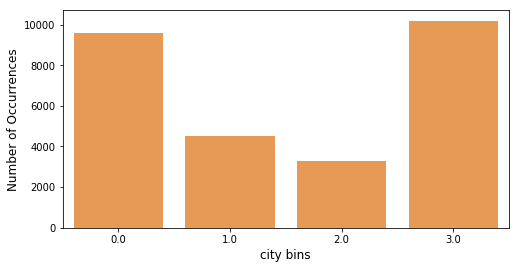

In [95]:
color = sns.color_palette()

int_level = df['city_bin'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('city bins', fontsize=12)
plt.show()

In [96]:
df['branch_code'].value_counts()

19      145
6       142
60      128
16      111
8       109
92      105
27       96
79       93
88       93
47       93
15       92
33       91
1        91
54       90
13       90
3        89
501      89
145      89
5        83
7        82
114      82
93       81
52       78
44       77
159      74
2        73
84       72
540      72
26       71
11       71
       ... 
1931      1
1283      1
3986      1
3466      1
2794      1
3450      1
2922      1
2954      1
3018      1
3066      1
3082      1
3114      1
2261      1
3178      1
3194      1
2213      1
3210      1
2197      1
3242      1
3258      1
2133      1
3274      1
3306      1
3338      1
1291      1
3386      1
3418      1
4082      1
4050      1
2049      1
Name: branch_code, Length: 3185, dtype: int64

In [97]:
df['branch_bin'] = df['branch_code'].copy()
counts = df.branch_code.value_counts()
df.branch_bin[df['branch_code'].isin(counts[counts >= 100].index)] = 2
df.branch_bin[df['branch_code'].isin(counts[counts < 100].index) & df['branch_bin'].isin(counts[counts >= 50].index)] = 1
df.branch_bin[df['branch_code'].isin(counts[counts < 50].index)] = 0

df['branch_bin'] = pd.to_numeric(df['branch_bin'], errors='coerce')


/home/mitushi/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mitushi/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/mitushi/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [98]:
df['branch_bin'].value_counts()

0    23237
1     4405
2      740
Name: branch_bin, dtype: int64

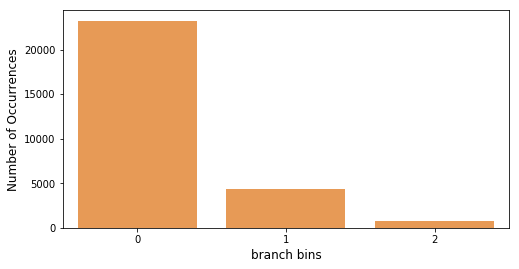

In [99]:
int_level = df['branch_bin'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('branch bins', fontsize=12)
plt.show()

### Bivariate Analysis

I have defined a function to quickly compare churn rates for different categories in each feature

In [106]:
def barplot_percentages(feature):
    #fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))
    ax1 = df.groupby(feature)['churn'].value_counts(normalize=True).unstack()
    ax1.plot(kind='bar', stacked='True')
    int_level = df[feature].value_counts()

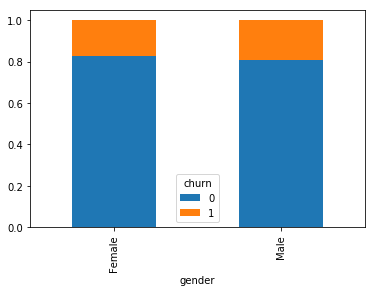

In [107]:
barplot_percentages("gender")

Gender doesn't seem like an imp variable as the percentage is same for churn:non churn

In [118]:
# Basically this is the dataframe
df.groupby('gender')['churn'].value_counts(normalize=True).unstack()

churn,0,1
gender,,
Female,0.824476,0.175524
Male,0.808496,0.191504


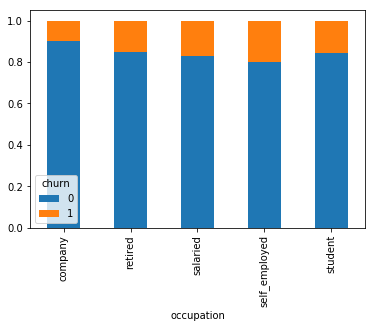

In [119]:
barplot_percentages("occupation")

Self Employed and salaried have higher churn rate and are the major categories.

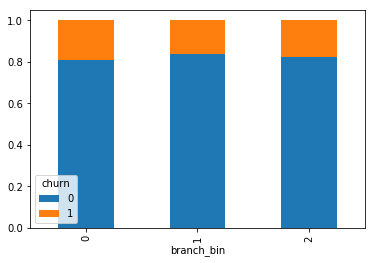

In [120]:
barplot_percentages("branch_bin")

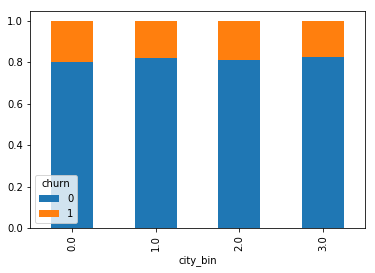

In [121]:
barplot_percentages("city_bin")

city and branch codes have little difference amongst the different types of branches

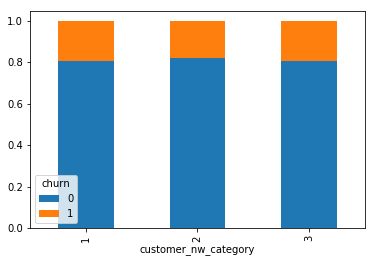

In [122]:
barplot_percentages("customer_nw_category")

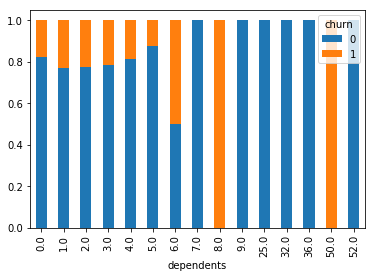

In [123]:
barplot_percentages("dependents")

customers with no of dependents  > 6 => show high variablity in churning out rate 

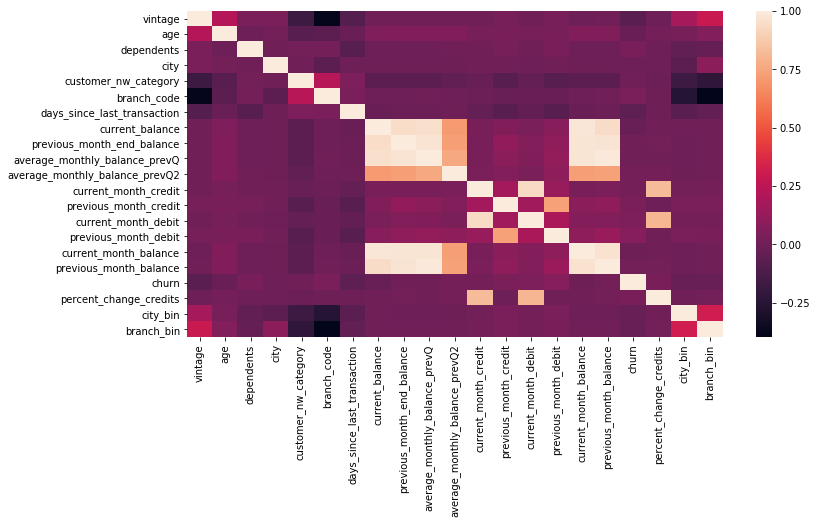

In [129]:
plt.figure(figsize=(12, 6))

sns.heatmap(df.corr())

#### Average customer Profile
Overall a customer at this bank:
* has no dependents
* has been a customer for last 6 years
* predominantly male
* either self employed or salaried customer

#### Conclusion for Churn
* From the sample, around 17% customers are churning
* Current balance and average monthly balance values have a left skewed distribution as observed from the histogram
* No significant difference in distributions for average monthly balance and month end balances
* Bimodal distribution/Double Bell Curve shows that there are 2 different types of customers with 2 brackets of credit and debit. Now, during the modeling phase, these could be considered as a seperate set of customers
* For debit values, we see that there is a significant difference in the distribution for churn and non churn and it might be turn out to be an important feature
* For most frequent vintage values, the churning customers are slightly higher, while for higher values of vintage, we have mostly non churning customers which is in sync with the age variable 
* Gender does not look like a very significant variable as the ratio of churned customers and others is very similar
* Self Employed and salaried have higher churn rate and are the most frequently occuring categories.
* Not much difference in customer net worth category when it comes to churn

## Churn prediction using Logistic Regression

In [68]:
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,StratifiedKFold , train_test_split
from sklearn.metrics import roc_auc_score , accuracy_score , confusion_matrix , roc_curve , precision_score , recall_score

In [69]:
df = pd.read_csv('churn_prediction.csv')

In [70]:
df.isna().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

#### Gender

categories within gender column

In [71]:
df['gender'].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

So there is a good mix of males and females and arguably missing values cannot be filled with any one of them. We could create a seperate category by assigning the value -1 for all missing values in this column.


In [72]:
#Convert Gender
dict_gender = {'Male': 1, 'Female':0}
df.replace({'gender': dict_gender}, inplace = True)

df['gender'] = df['gender'].fillna(-1)

#### Dependents, occupation and city with mode


In [73]:
df['dependents'].value_counts()

0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
36.0        1
52.0        1
25.0        1
9.0         1
50.0        1
32.0        1
8.0         1
Name: dependents, dtype: int64

In [74]:
df['occupation'].value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [75]:
df['dependents'] = df['dependents'].fillna(0)
df['occupation'] = df['occupation'].fillna(df['occupation'].mode())
df['city'] = df['city'].fillna(1020)

A fair assumption can be made on this column as this is number of days since last transaction in 1 year, we can substitute missing values with a value greater than 1 year say 999

In [76]:
df['days_since_last_transaction'] = df['days_since_last_transaction'].fillna(999)

### Dummies with Multiple Categories

In [77]:
# Convert occupation to one hot encoded features
df = pd.concat([df,pd.get_dummies(df['occupation'],prefix = str('occupation'),prefix_sep='_')],axis = 1)

In [78]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135,66,1.0,0.0,self_employed,187.0,2,755,224.0,...,0.20,0.20,1458.71,1458.71,0,0,0,0,1,0
1,2,310,35,1.0,0.0,self_employed,1020.0,2,3214,60.0,...,5486.27,100.56,6496.78,8787.61,0,0,0,0,1,0
2,4,2356,31,1.0,0.0,salaried,146.0,2,41,999.0,...,6046.73,259.23,5006.28,5070.14,0,0,0,1,0,0
3,5,478,90,-1.0,0.0,self_employed,1020.0,2,582,147.0,...,0.47,2143.33,2291.91,1669.79,1,0,0,0,1,0
4,6,2531,42,1.0,2.0,self_employed,1494.0,3,388,58.0,...,588.62,1538.06,1157.15,1677.16,1,0,0,0,1,0


### Scaling Numerical Features for Logistic Regression

Now, we remember that there are a lot of outliers in the dataset especially when it comes to previous and current balance features. Also, the distributions are skewed for these features if you recall from the EDA. We will take 2 steps to deal with that here:
* Log Transformation
* Standard Scaler

Standard scaling is anyways a necessity when it comes to linear models and we have done that here after doing log transformation on all balance features.

In [79]:
#These were the skewed columns
num_cols = ['customer_nw_category', 'current_balance',
            'previous_month_end_balance', 'average_monthly_balance_prevQ2', 'average_monthly_balance_prevQ',
            'current_month_credit','previous_month_credit', 'current_month_debit', 
            'previous_month_debit','current_month_balance', 'previous_month_balance']
for i in num_cols:
    df[i] = np.log(df[i] + 17000)

std = StandardScaler()
scaled = std.fit_transform(df[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

In [80]:
df_df_og = df.copy()
df = df.drop(columns = num_cols,axis = 1)
df = df.merge(scaled,left_index=True,right_index=True,how = "left")

In [81]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,branch_code,days_since_last_transaction,churn,...,current_balance,previous_month_end_balance,average_monthly_balance_prevQ2,average_monthly_balance_prevQ,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
0,1,3135,66,1.0,0.0,self_employed,187.0,755,224.0,0,...,-0.613738,-0.632367,-0.630646,-0.697612,-0.313931,-0.324487,-0.368251,-0.377390,-0.653455,-0.666207
1,2,310,35,1.0,0.0,self_employed,1020.0,3214,60.0,0,...,0.011267,0.446458,0.949414,0.317595,-0.313852,-0.324410,0.640986,-0.355677,0.149440,0.455680
2,4,2356,31,1.0,0.0,salaried,146.0,41,999.0,0,...,-0.209651,0.057975,-0.388637,-0.108263,-0.313841,-0.324400,0.729825,-0.321607,-0.068597,-0.066642
3,5,478,90,-1.0,0.0,self_employed,1020.0,582,147.0,1,...,-0.470836,-0.488530,-0.712855,-0.582976,-0.313872,-0.324429,-0.368193,0.060593,-0.506570,-0.628056
4,6,2531,42,1.0,2.0,self_employed,1494.0,388,58.0,1,...,-0.708214,-0.642441,-0.554058,-0.663399,-0.313902,-0.175104,-0.245463,-0.057927,-0.708257,-0.626732


In [82]:
y_all = df.churn
df = df.drop(['churn','customer_id','occupation'],axis = 1)

## Model Building and Evaluation Metrics
Since this is a binary classification problem, we could use the following 2 popular metrics:

1. Recall
2. Area under the Receiver operating characteristic curve


In [83]:
baseline_cols = ['current_month_debit', 'previous_month_debit','current_balance','previous_month_end_balance','vintage'
                 ,'occupation_retired', 'occupation_salaried','occupation_self_employed', 'occupation_student']

In [84]:
df_baseline = df[baseline_cols]

In [85]:
# Splitting the data into Train and Validation set
xtrain, xtest, ytrain, ytest = train_test_split(df_baseline,y_all,test_size=1/3, random_state=11, stratify = y_all)

In [86]:
model = LogisticRegression()
model.fit(xtrain,ytrain)
pred = model.predict_proba(xtest)[:,1]

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [87]:
pred

array([0.13776368, 0.17830407, 0.23862   , ..., 0.14999883, 0.23971641,
       0.15748766])

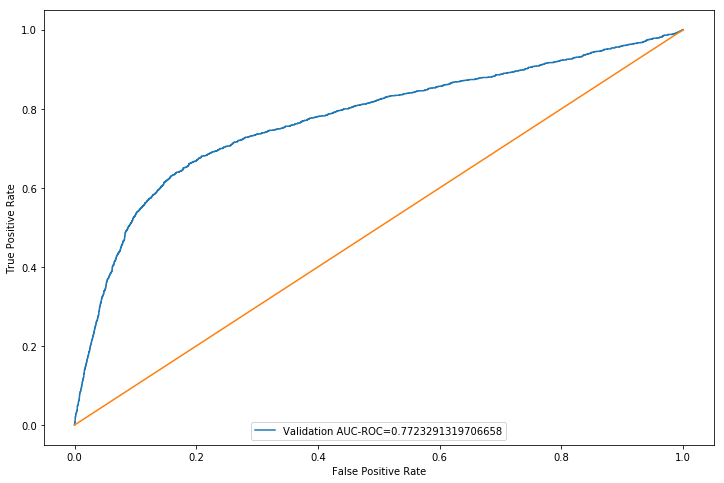

In [88]:
### AUC ROC Curve & Confusion Matrix 
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest,pred) 
auc = roc_auc_score(ytest, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc)) 
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=8) 
plt.show()

In [89]:
# Confusion Matrix
pred_val = model.predict(xtest)

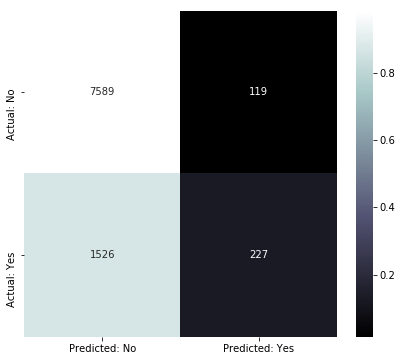

In [90]:
label_preds = pred_val

cm = confusion_matrix(ytest,label_preds)


def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=['Predicted: No','Predicted: Yes'], yticklabels=['Actual: No','Actual: Yes'], cmap=cmap)

plot_confusion_matrix(cm, ['No', 'Yes'])

In [91]:
# Recall Score
recall_score(ytest,pred_val)

0.12949229891614375

In [92]:
### Cross validation

def cv_score(ml_model, rstate = 12, thres = 0.5, cols = df.columns):
    i = 1
    cv_scores = []
    df1 = df.copy()
    df1 = df[cols]
    
    # 5 Fold cross validation stratified on the basis of target
    kf = StratifiedKFold(n_splits=5,random_state=rstate,shuffle=True)
    for df_index,test_index in kf.split(df1,y_all):
        print('\n{} of kfold {}'.format(i,kf.n_splits))
        xtr,xvl = df1.loc[df_index],df1.loc[test_index]
        ytr,yvl = y_all.loc[df_index],y_all.loc[test_index]
            
        # Define model for fitting on the training set for each fold
        model = ml_model
        model.fit(xtr, ytr)
        pred_probs = model.predict_proba(xvl)
        pp = []
         
        # Use threshold to define the classes based on probability values
        for j in pred_probs[:,1]:
            if j>thres:
                pp.append(1)
            else:
                pp.append(0)
         
        # Calculate scores for each fold and print
        pred_val = pp
        roc_score = roc_auc_score(yvl,pred_probs[:,1])
        recall = recall_score(yvl,pred_val)
        precision = precision_score(yvl,pred_val)
        sufix = ""
        msg = ""
        msg += "ROC AUC Score: {}, Recall Score: {:.4f}, Precision Score: {:.4f} ".format(roc_score, recall,precision)
        print("{}".format(msg))
         
         # Save scores
        cv_scores.append(roc_score)
        i+=1
    return cv_scores


In [93]:
baseline_scores = cv_score(LogisticRegression(), cols = baseline_cols)


1 of kfold 5
ROC AUC Score: 0.7624527797759736, Recall Score: 0.1359, Precision Score: 0.6590 

2 of kfold 5


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ROC AUC Score: 0.7822186825608878, Recall Score: 0.1226, Precision Score: 0.6548 

3 of kfold 5
ROC AUC Score: 0.7557445366874104, Recall Score: 0.1283, Precision Score: 0.6081 

4 of kfold 5


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ROC AUC Score: 0.7688278300024998, Recall Score: 0.1207, Precision Score: 0.6615 

5 of kfold 5
ROC AUC Score: 0.7630144263028404, Recall Score: 0.1331, Precision Score: 0.6422 


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Now let us try using all columns available to check if we get significant improvement.

In [94]:
all_feat_scores = cv_score(LogisticRegression())


1 of kfold 5


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ROC AUC Score: 0.7930995786661186, Recall Score: 0.2082, Precision Score: 0.7552 

2 of kfold 5


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ROC AUC Score: 0.7994134210255883, Recall Score: 0.2034, Precision Score: 0.7405 

3 of kfold 5


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ROC AUC Score: 0.7768766363624403, Recall Score: 0.1911, Precision Score: 0.7128 

4 of kfold 5


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ROC AUC Score: 0.803840024602997, Recall Score: 0.2139, Precision Score: 0.7450 

5 of kfold 5


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ROC AUC Score: 0.7937036226926468, Recall Score: 0.2186, Precision Score: 0.7468 


There is some improvement in both ROC AUC Scores and Precision/Recall Scores. 

In [96]:
### Reverse Feature Elimination or Backward Selection

from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Create the RFE object and rank each feature
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=1, step=1)
rfe.fit(df, y_all)

ranking_df = pd.DataFrame()
ranking_df['Feature_name'] = df.columns
ranking_df['Rank'] = rfe.ranking_

ranked = ranking_df.sort_values(by=['Rank'])

ranked

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

,Feature_name,Rank
13,current_balance,1
16,average_monthly_balance_prevQ,2
7,occupation_company,3
15,average_monthly_balance_prevQ2,4
21,current_month_balance,5
22,previous_month_balance,6
19,current_month_debit,7
8,occupation_retired,8
20,previous_month_debit,9
10,occupation_self_employed,10


In [97]:
ranked

,Feature_name,Rank
13,current_balance,1
16,average_monthly_balance_prevQ,2
7,occupation_company,3
15,average_monthly_balance_prevQ2,4
21,current_month_balance,5
22,previous_month_balance,6
19,current_month_debit,7
8,occupation_retired,8
20,previous_month_debit,9
10,occupation_self_employed,10


In [100]:
rfe_top_10_scores = cv_score(LogisticRegression(), cols = ranked['Feature_name'][:10].values)


1 of kfold 5
ROC AUC Score: 0.7924517521323605, Recall Score: 0.2243, Precision Score: 0.7375 

2 of kfold 5


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ROC AUC Score: 0.811069160415168, Recall Score: 0.2234, Precision Score: 0.7165 

3 of kfold 5
ROC AUC Score: 0.7893473216282709, Recall Score: 0.2101, Precision Score: 0.7061 

4 of kfold 5


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ROC AUC Score: 0.803595803675977, Recall Score: 0.2177, Precision Score: 0.7293 

5 of kfold 5
ROC AUC Score: 0.797471367768758, Recall Score: 0.2063, Precision Score: 0.7185 


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [101]:
results_df = pd.DataFrame({'baseline':baseline_scores, 'all_feats': all_feat_scores, 'rfe_top_10': rfe_top_10_scores})

In [102]:
#changing the threshold
cv_score(LogisticRegression(), cols = ranked['Feature_name'][:10].values, thres=0.14)


1 of kfold 5
ROC AUC Score: 0.7924517521323605, Recall Score: 0.7975, Precision Score: 0.2893 

2 of kfold 5


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ROC AUC Score: 0.811069160415168, Recall Score: 0.8451, Precision Score: 0.3006 

3 of kfold 5
ROC AUC Score: 0.7893473216282709, Recall Score: 0.8032, Precision Score: 0.2889 

4 of kfold 5


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ROC AUC Score: 0.803595803675977, Recall Score: 0.8232, Precision Score: 0.2949 

5 of kfold 5
ROC AUC Score: 0.797471367768758, Recall Score: 0.8327, Precision Score: 0.2876 


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.7924517521323605,
 0.811069160415168,
 0.7893473216282709,
 0.803595803675977,
 0.797471367768758]

There is continuous improvement in the Recall Score. However, clearly precision score is going down. On the basis of business requirement the bank can take a call on deciding the threshold. 

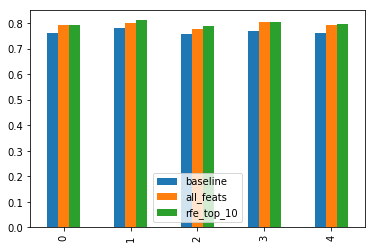

In [103]:
results_df.plot(y=["baseline", "all_feats", "rfe_top_10"], kind="bar")

Here, we can see that the model based on RFE is giving the best result for each fold